In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings('ignore')

In [44]:
df= pd.read_csv('C:/Users/KahindiE/Desktop/data_science/online_course_engagement_data.csv')
df.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


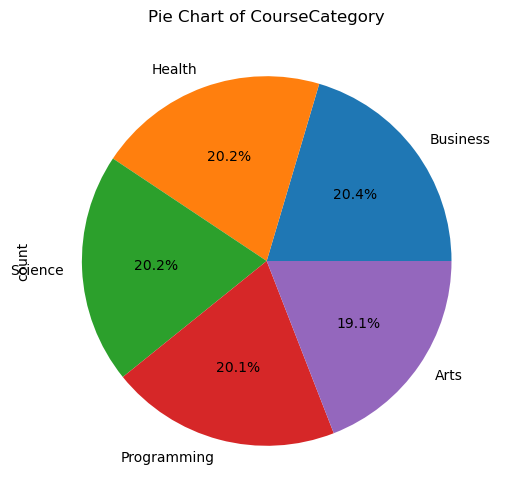

In [45]:
#piechart for CourseCategory
plt.figure(figsize=(10, 6))
df['CourseCategory'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of CourseCategory')
plt.show()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 632.9+ KB


In [47]:
df.describe()

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4498.894556,50.163822,10.024667,5.090556,74.706028,50.340146,0.500667,0.396444
std,2596.849433,28.491750,6.029878,3.157762,14.378383,28.950977,0.500027,0.489186
min,1.000000,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,2251.750000,25.440548,5.000000,2.000000,62.283451,25.653614,0.000000,0.000000
50%,4483.500000,49.818417,10.000000,5.000000,74.743294,50.264124,1.000000,0.000000
75%,6751.250000,75.069924,15.000000,8.000000,87.022663,75.572493,1.000000,1.000000
max,9000.000000,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


In [48]:
df.isnull().sum()

UserID                   0
CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64

In [49]:
df.duplicated().sum()

877

In [50]:
df.drop_duplicates(inplace=True)

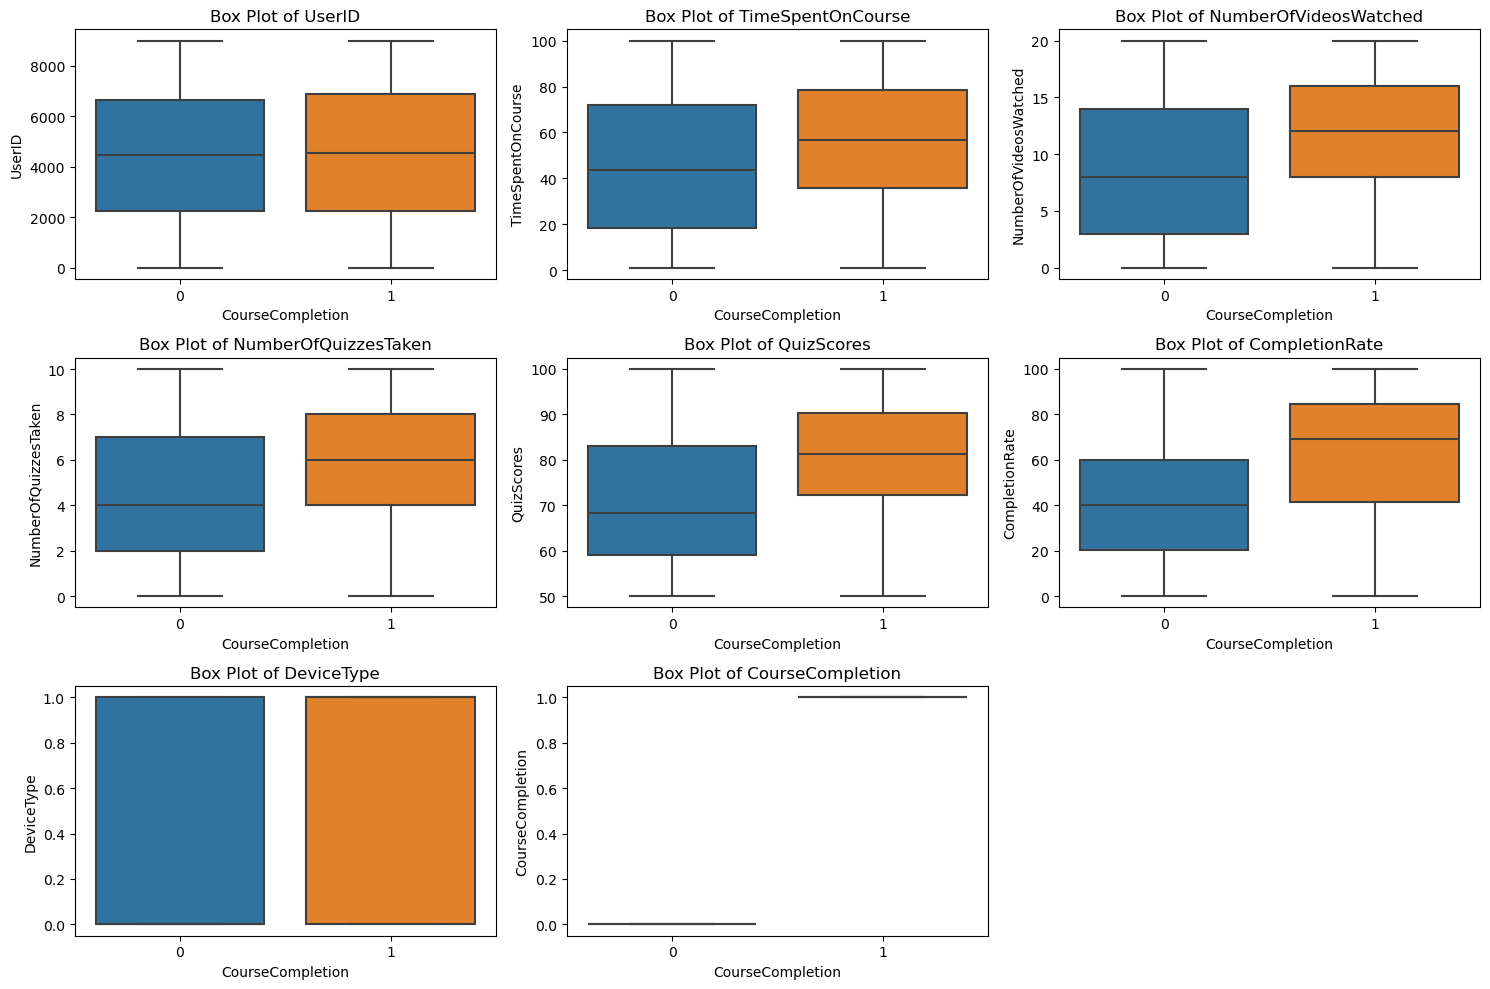

In [51]:
#checking for outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=[np.number]).columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='CourseCompletion', y=column, data=df)
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

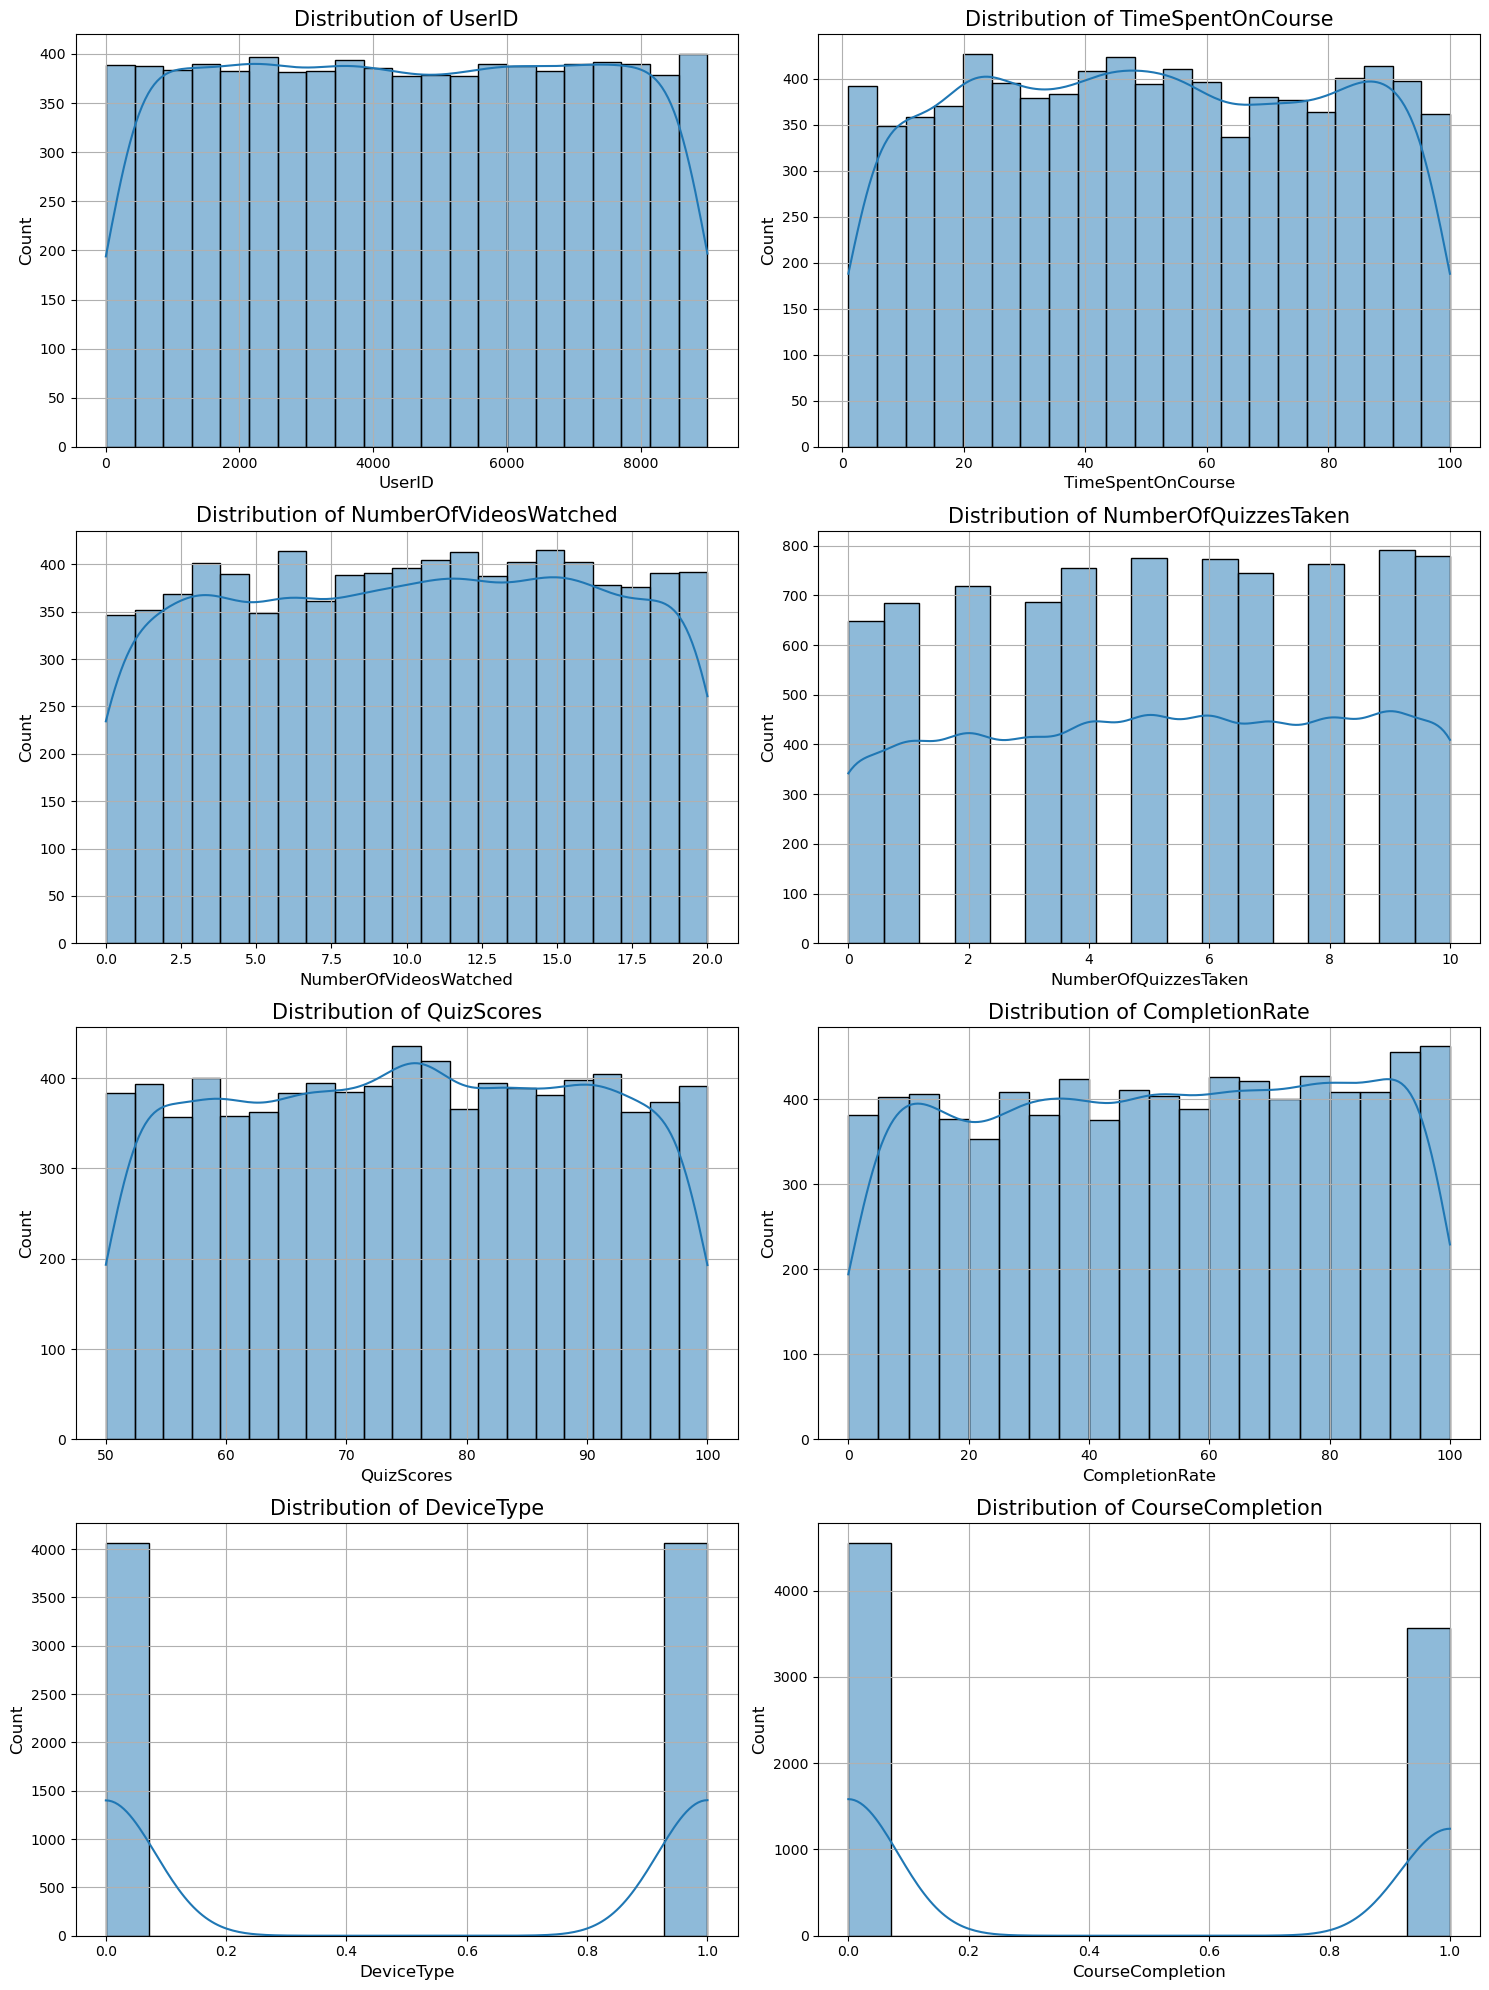

In [52]:
# Plot distribution of numeric features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

# Select numeric features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

# Number of features
num_features = len(numeric_features)

# Create subplots
fig, axes = plt.subplots(nrows=(num_features + 1) // 2, ncols=2, figsize=(15, num_features * 2.5))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through each numeric feature and corresponding subplot
for i, feature in enumerate(numeric_features):
    try:
        sns.histplot(data=df, x=feature, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature}', fontsize=15)
        axes[i].set_xlabel(feature, fontsize=12)
        axes[i].set_ylabel('Count', fontsize=12)
        axes[i].grid(True)
    except Exception as e:
        print(f"Could not plot {feature} due to {e}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [53]:
#remove outliers using z-scores
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]

In [54]:
# Apply Shapiro-Wilk test and normalize if needed
for col in df.select_dtypes(include=[np.number]).columns:
    stat, p = stats.shapiro(df[col])
    print(f"Shapiro-Wilk test for {col}:")
    print(f"Statistic: {stat:.4f}")
    print(f"P-value: {p:.4f}")
    if p > 0.05:
        print("The data is normally distributed.")
    else:
        print("The data is not normally distributed. Applying power transformation.")

Shapiro-Wilk test for UserID:
Statistic: 0.9544
P-value: 0.0000
The data is not normally distributed. Applying power transformation.
Shapiro-Wilk test for TimeSpentOnCourse:
Statistic: 0.9566
P-value: 0.0000
The data is not normally distributed. Applying power transformation.
Shapiro-Wilk test for NumberOfVideosWatched:
Statistic: 0.9523
P-value: 0.0000
The data is not normally distributed. Applying power transformation.
Shapiro-Wilk test for NumberOfQuizzesTaken:
Statistic: 0.9405
P-value: 0.0000
The data is not normally distributed. Applying power transformation.
Shapiro-Wilk test for QuizScores:
Statistic: 0.9574
P-value: 0.0000
The data is not normally distributed. Applying power transformation.
Shapiro-Wilk test for CompletionRate:
Statistic: 0.9533
P-value: 0.0000
The data is not normally distributed. Applying power transformation.
Shapiro-Wilk test for DeviceType:
Statistic: 0.6367
P-value: 0.0000
The data is not normally distributed. Applying power transformation.
Shapiro-Wilk 

In [55]:
#encoding categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns: 
    df[col] = le.fit_transform(df[col])
df.head()


,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,2,29.979719,17,3,50.365656,20.860773,1,0
1,4326,0,27.802640,1,5,62.615970,65.632415,1,0
2,5849,0,86.820485,14,2,78.458962,63.812007,1,1
3,4992,4,35.038427,17,10,59.198853,95.433162,0,1
4,3866,3,92.490647,16,0,98.428285,18.102478,0,0


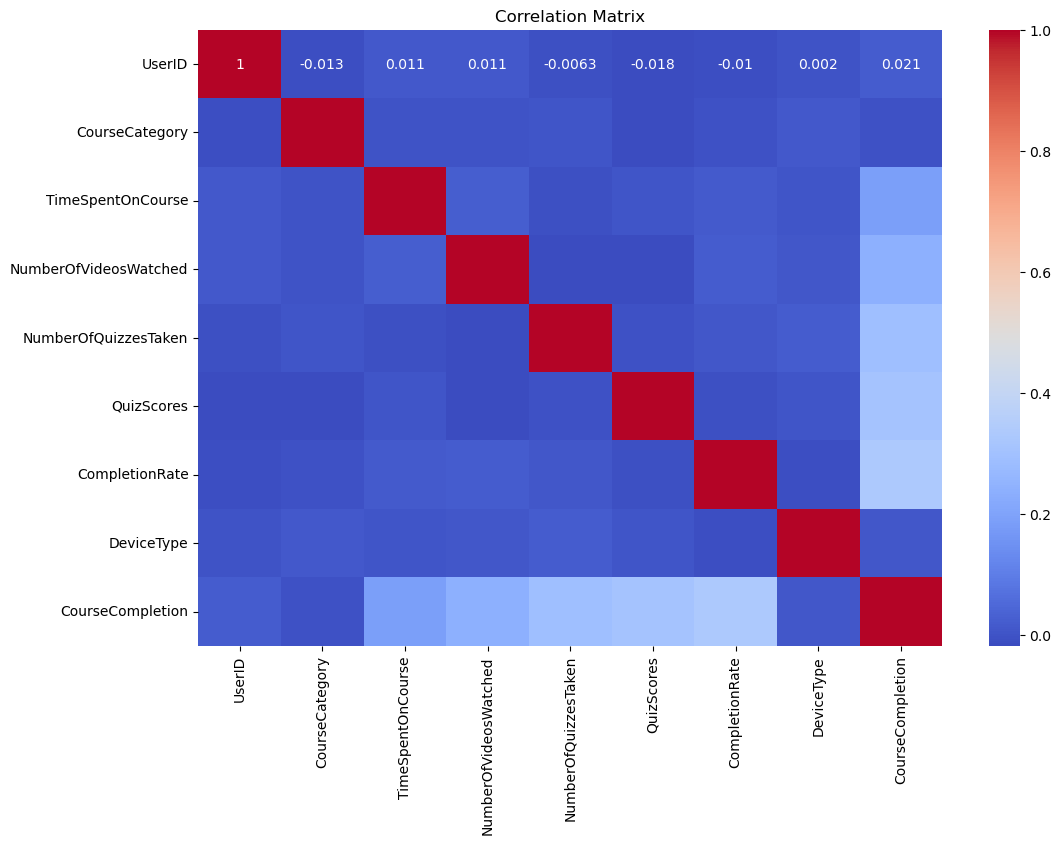

In [56]:
# Plot correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [57]:
# Splitting the data
X = df.drop('CourseCompletion', axis=1)
y = df['CourseCompletion']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
#Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Feature Importances:', gb.feature_importances_)
print('Best Parameters:', gb.get_params() )

Accuracy: 0.9581538461538461
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       894
           1       0.95      0.96      0.95       731

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625

Confusion Matrix:
 [[858  36]
 [ 32 699]]
Feature Importances: [0.10585637 0.         0.11256891 0.15045838 0.20953868 0.21198315
 0.20959451 0.        ]
Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
